# Almohadilla es título
Primera prueba
_____________________

## Instrucciones de entrada (doble almohadilla es sección y tres es subsección...y así suscesivamente)
He entrado al servidor (utilizando la terminal tecleando, después de habilitar MDLab3, jupyter nootebook

Notas:

1) Al seleccionar "Markdown" se trabaja sólo con texto.
https://daringfireball.net/projects/markdown/syntax
https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
https://guides.github.com/features/mastering-markdown/

2) Desde la línea de código prepararemos el jupyterNB con opciones de comportamiento de NB


In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys, os, shutil
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import MDAnalysis as MDAnalysis
import MDAnalysis.analysis.hbonds.hbond_analysis
import MDAnalysis.analysis.distances
import mdtraj as md
import pytraj as pt
import nglview as nv
import seaborn as sns
#sns.set()

In [4]:
# Matplotlib options
%matplotlib inline
matplotlib.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [5]:
dir_system="/DATA/projects/Learning_Python/MD_Analysis_examples/dhfr-solv/"

In [6]:
dir_system

'/DATA/projects/Learning_Python/MD_Analysis_examples/dhfr-solv/'

In [7]:
filename_traj="traj_comp.xtc"
filename_coors="dhfr_23558.gro"
filename_top="dhfr_23558.top"

In [8]:
file_traj=dir_system+filename_traj
file_coors=dir_system+filename_coors
file_top=dir_system+filename_top

In [9]:
file_traj

'/DATA/projects/Learning_Python/MD_Analysis_examples/dhfr-solv/traj_comp.xtc'

In [10]:
md_coors = md.load(file_coors)
md_coors.remove_solvent()
view = nv.show_mdtraj(md_coors)
view

NGLWidget()

In [11]:
dir(md_coors)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_valid_unitcell',
 '_distance_unit',
 '_have_unitcell',
 '_rmsd_traces',
 '_savers',
 '_string_summary_basic',
 '_time',
 '_time_default_to_arange',
 '_topology',
 '_unitcell_angles',
 '_unitcell_lengths',
 '_xyz',
 'atom_slice',
 'center_coordinates',
 'image_molecules',
 'join',
 'load',
 'make_molecules_whole',
 'n_atoms',
 'n_chains',
 'n_frames',
 'n_residues',
 'openmm_boxes',
 'openmm_positions',
 'remove_solvent',
 'restrict_atoms',
 'save',
 'save_amberrst7',
 'save_binpos',
 'save_dcd',
 'save_dtr',
 'save_gro',
 'save_hdf5',
 'save_lammpstrj',
 'save_lh5',
 'save_m

In [12]:
print(md_coors.n_atoms)

23558


In [13]:
print(md_coors.unitcell_lengths)

[[6.223 6.223 6.223]]


In [14]:
md_traj = md.load(file_traj, top=file_coors)
md_traj.remove_solvent()
md_traj.center_coordinates()
traj_view = nv.show_mdtraj(md_traj)
traj_view

NGLWidget(count=20001)

In [15]:
dir(md_traj)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_valid_unitcell',
 '_distance_unit',
 '_have_unitcell',
 '_rmsd_traces',
 '_savers',
 '_string_summary_basic',
 '_time',
 '_time_default_to_arange',
 '_topology',
 '_unitcell_angles',
 '_unitcell_lengths',
 '_xyz',
 'atom_slice',
 'center_coordinates',
 'image_molecules',
 'join',
 'load',
 'make_molecules_whole',
 'n_atoms',
 'n_chains',
 'n_frames',
 'n_residues',
 'openmm_boxes',
 'openmm_positions',
 'remove_solvent',
 'restrict_atoms',
 'save',
 'save_amberrst7',
 'save_binpos',
 'save_dcd',
 'save_dtr',
 'save_gro',
 'save_hdf5',
 'save_lammpstrj',
 'save_lh5',
 'save_m

In [16]:
print(md_traj.n_frames)

20001


In [23]:
rmsds = md.rmsd(md_traj, md_traj, 0, precentered=True) # md_traj.center_coordinates() was executed before

In [24]:
print(rmsds)

[0.         0.03476282 0.5592068  ... 4.314513   4.312313   4.311931  ]


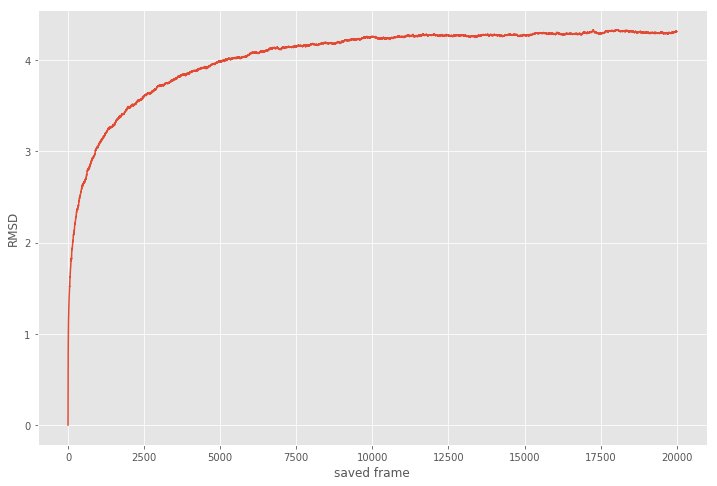

In [25]:
plt.plot(rmsds)
plt.xlabel("saved frame")
plt.ylabel("RMSD")
plt.show()

In [26]:
del(md_traj)

In [27]:
u = MDAnalysis.Universe(file_coors,file_traj)

In [28]:
dir(u)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_anchor_name',
 '_anchor_uuid',
 '_cache',
 '_class_bases',
 '_classes',
 '_fragdict',
 '_gen_anchor_hash',
 '_generate_from_topology',
 '_instant_selectors',
 '_kwargs',
 '_process_attr',
 '_topology',
 '_trajectory',
 'add_Residue',
 'add_Segment',
 'add_TopologyAttr',
 'anchor_name',
 'angles',
 'atoms',
 'bonds',
 'coord',
 'dihedrals',
 'dimensions',
 'empty',
 'filename',
 'impropers',
 'is_anchor',
 'kwargs',
 'load_new',
 'make_anchor',
 'remove_anchor',
 'residues',
 'segments',
 'select_atoms',
 'trajectory',
 'transfer_to_memory',
 'universe']

In [29]:
print(len(u.atoms))

23558


In [30]:
print("Number of atoms:",len(u.atoms),"  Number of frames:", len(u.trajectory))

Number of atoms: 23558   Number of frames: 20001


In [33]:
print(u.residues.resnames[253])

WAT


In [34]:
group_O_wats=u.select_atoms('name O and resname WAT')


In [38]:
for atom in group_O_wats.atoms:
    atom.name='OW'

In [35]:
dir(group_O_wats)

['_SETATTR_WHITELIST',
 '__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_add_prop',
 '_cache',
 '_derived_class',
 '_get_named_atom',
 '_is_group',
 '_ix',
 '_mix',
 '_subclass',
 '_u',
 'align_principal_axis',
 'angle',
 'asphericity',
 'atoms',
 'bbox',
 'bond',
 'bsphere',
 'center',
 'center_of_geometry',
 'center_of_mass',
 'centroid',
 'concatenate',
 'difference',
 'dihedral',
 'dimensions',
 'forces',
 'groupby',
 'guess_bonds',
 'ids',
 'improper',
 'indices',
 'intersection',
 'is_strict_subset',
 'is_strict_superset',
 'isdisjo

In [36]:
print(group_O_wats.n_atoms)

7023


In [39]:
print(group_O_wats.atoms)

<AtomGroup [<Atom 2490: OW of type O of resname WAT, resid 160 and segid SYSTEM>, <Atom 2493: OW of type O of resname WAT, resid 161 and segid SYSTEM>, <Atom 2496: OW of type O of resname WAT, resid 162 and segid SYSTEM>, ..., <Atom 23550: OW of type O of resname WAT, resid 7180 and segid SYSTEM>, <Atom 23553: OW of type O of resname WAT, resid 7181 and segid SYSTEM>, <Atom 23556: OW of type O of resname WAT, resid 7182 and segid SYSTEM>]>


In [40]:
print(group_O_wats.atoms[5000])

<Atom 17490: OW of type O of resname WAT, resid 5160 and segid SYSTEM>


In [41]:
print(group_O_wats.atoms[5000].name)

OW


In [42]:
print(u.atoms[4].name)

CA


In [43]:
print(u.atoms[4].resname)

MET


In [44]:
h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u, 'protein', 'resname WAT', distance=3.0, angle=120.0, step=1000, filter_first=True)
h.run()

HBonds frame 20000:    21/21 [100.0%]


In [45]:
h

In [46]:
dir(h)

['DEFAULT_ACCEPTORS',
 'DEFAULT_DONORS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_donor_lookup_table_byindex',
 '_donor_lookup_table_byres',
 '_get_bonded_hydrogens',
 '_get_bonded_hydrogens_algorithms',
 '_get_bonded_hydrogens_dist',
 '_get_bonded_hydrogens_list',
 '_has_timeseries',
 '_log_parameters',
 '_reformat_hb',
 '_s1',
 '_s1_acceptors',
 '_s1_donors',
 '_s1_donors_h',
 '_s2',
 '_s2_acceptors',
 '_s2_donors',
 '_s2_donors_h',
 '_sanity_check',
 '_timeseries',
 '_update_selection_1',
 '_update_selection_2',
 'acceptors',
 'angle',
 'calc_angle',
 'calc_eucl_distance',
 'count_by_time',
 'count_by_type',
 'debug',
 'detect_hydrogens',
 'distance',
 'dis

In [47]:
print(h.forcefield)

CHARMM27


In [48]:
h.generate_table()
hbonds_table=h.table
hbonds_timeseries=h.timeseries
num_hbonds_per_frame=[len(patata) for patata in hbonds_timeseries]

In [49]:
hbonds_table

rec.array([(   0.,     1, 15710, 'MET',    1, 'H1', 'WAT', 4567, 'OW', 2.15151024, 145.53407288),
           (   0.,     2, 13541, 'MET',    1, 'H2', 'WAT', 3844, 'OW', 2.31671977, 123.32692719),
           (   0.,     2, 20135, 'MET',    1, 'H2', 'WAT', 6042, 'OW', 2.08196974, 136.42591858),
           ...,
           (1000., 23295,   773, 'WAT', 7095, 'H1', 'GLU',   48, 'OE1', 1.87387753, 139.77110291),
           (1000., 23307,  2236, 'WAT', 7099, 'H1', 'ASP',  144, 'OD1', 1.73533738, 165.19328308),
           (1000., 23512,   316, 'WAT', 7167, 'H2', 'PRO',   21, 'O', 2.01566243, 145.12998962)],
          dtype=[('time', '<f8'), ('donor_index', '<i8'), ('acceptor_index', '<i8'), ('donor_resnm', '<U4'), ('donor_resid', '<i8'), ('donor_atom', '<U4'), ('acceptor_resnm', '<U4'), ('acceptor_resid', '<i8'), ('acceptor_atom', '<U4'), ('distance', '<f8'), ('angle', '<f8')])

In [50]:
hbonds_timeseries

[[[1, 15710, 'MET1:H1', 'WAT4567:OW', 2.1515102, 145.53407],
  [2, 13541, 'MET1:H2', 'WAT3844:OW', 2.3167198, 123.32693],
  [2, 20135, 'MET1:H2', 'WAT6042:OW', 2.0819697, 136.42592],
  [3, 6116, 'MET1:H3', 'WAT1369:OW', 2.3518918, 162.67381],
  [20, 12731, 'ILE2:H', 'WAT3574:OW', 1.8787497, 173.06108],
  [98, 22481, 'ALA7:H', 'WAT6824:OW', 2.141707, 156.54156],
  [184, 4604, 'ARG12:HH21', 'WAT865:OW', 2.4714367, 123.40148],
  [184, 7877, 'ARG12:HH21', 'WAT1956:OW', 2.7141645, 139.4734],
  [185, 5201, 'ARG12:HH22', 'WAT1064:OW', 1.7822728, 167.79314],
  [272, 12020, 'ASN18:HD21', 'WAT3337:OW', 2.1227136, 162.06746],
  [273, 18671, 'ASN18:HD22', 'WAT5554:OW', 2.2813601, 174.20314],
  [277, 10847, 'ALA19:H', 'WAT2946:OW', 2.3854134, 150.03662],
  [287, 17420, 'MET20:H', 'WAT5137:OW', 2.0734048, 164.30939],
  [328, 13154, 'TRP22:HE1', 'WAT3715:OW', 2.1312428, 158.59016],
  [351, 10772, 'ASN23:HD21', 'WAT2921:OW', 2.5919285, 127.40135],
  [351, 21872, 'ASN23:HD21', 'WAT6621:OW', 2.795586, 1

In [51]:
len(hbonds_timeseries)

21

In [52]:
len(hbonds_timeseries[1])

471

In [56]:
print(hbonds_timeseries[1][-1])

[23359, 1853, 'WAT7116:H2', 'GLU118:OE2', 1.7817698, 159.99365]


In [57]:
num_hbonds_per_frame=[len(patata) for patata in hbonds_timeseries]

In [58]:
num_hbonds_per_frame

[467,
 471,
 500,
 463,
 480,
 483,
 493,
 502,
 500,
 480,
 480,
 482,
 469,
 510,
 475,
 476,
 483,
 493,
 503,
 478,
 481]

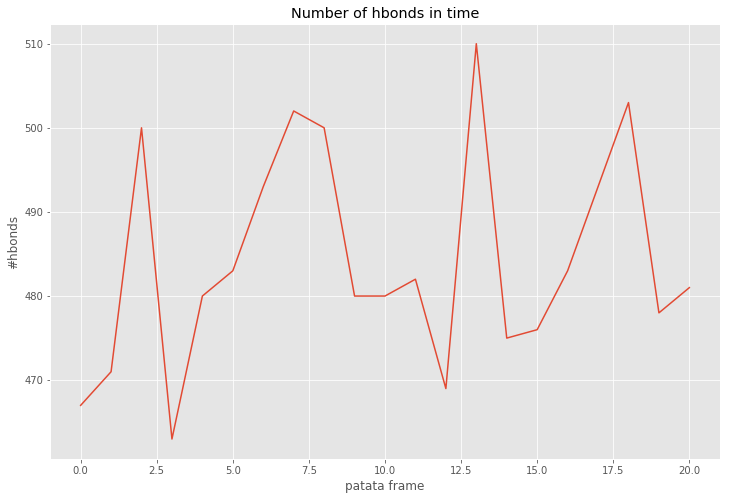

In [59]:
plt.plot(num_hbonds_per_frame)
plt.xlabel("patata frame")
plt.ylabel("#hbonds")
plt.title("Number of hbonds in time")
plt.show()

/opt/apps/conda/intel-2018.1.163_miniconda/envs/MDLab3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


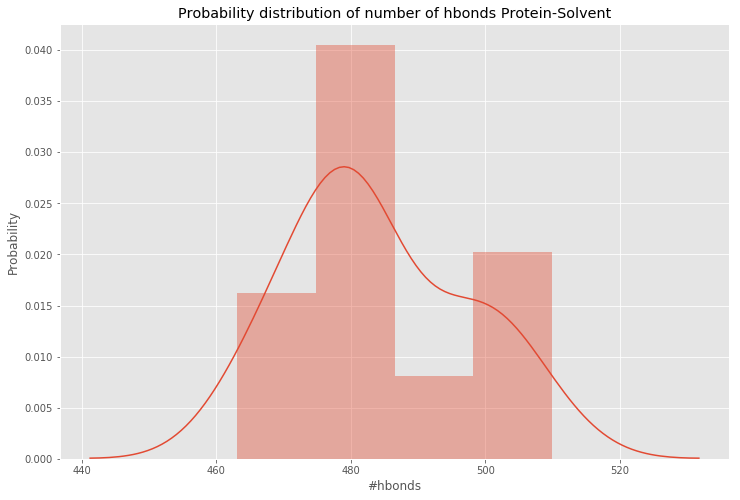

In [60]:
sns.distplot(num_hbonds_per_frame)
plt.xlabel("#hbonds")
plt.ylabel("Probability")
plt.title("Probability distribution of number of hbonds Protein-Solvent")
plt.show()

In [61]:
aaa={}
aaa['foo']='lkj'
aaa[8]=5

In [62]:
aaa

{8: 5, 'foo': 'lkj'}

In [63]:
print(aaa[8])

5


In [64]:
contador_de_eventos={}
contador_de_eventos['ALA1']=0
contador_de_eventos['MET2']=0

In [65]:
contador_de_eventos['ALA1']=contador_de_eventos['ALA1']+1

In [66]:
contador_de_eventos['ALA1']=contador_de_eventos['ALA1']+1

In [67]:
contador_de_eventos

{'ALA1': 2, 'MET2': 0}

In [68]:
waters_hbonded={} # Counting number of frames a given water molecule is hbonded to the protein
aminoacids_hbonded={} # Counting number of frames a given aa is hbonded to the solvent
for hbonds_frame in hbonds_timeseries:
    resids_hbonded_in_frame=[]
    for hbond in hbonds_frame:
        res1=hbond[2].split(':')[0]
        res2=hbond[3].split(':')[0]
        resids_hbonded_in_frame.extend([res1,res2])
    resids_hbonded_in_frame=np.unique(resids_hbonded_in_frame)
    for resid in resids_hbonded_in_frame:
        if resid.startswith('WAT'):
            if resid in waters_hbonded.keys():
                waters_hbonded[resid]+=1
            else:
                waters_hbonded[resid]=1
        else:
            if resid in aminoacids_hbonded.keys():
                aminoacids_hbonded[resid]+=1
            else:
                aminoacids_hbonded[resid]=1

In [69]:
waters_hbonded

{'WAT1000': 1,
 'WAT1002': 3,
 'WAT1029': 1,
 'WAT1033': 1,
 'WAT1058': 1,
 'WAT1064': 3,
 'WAT1082': 5,
 'WAT1084': 4,
 'WAT1092': 2,
 'WAT1104': 2,
 'WAT1121': 1,
 'WAT1143': 2,
 'WAT1146': 1,
 'WAT1158': 5,
 'WAT1173': 3,
 'WAT1180': 2,
 'WAT1227': 5,
 'WAT1265': 1,
 'WAT1280': 3,
 'WAT1285': 3,
 'WAT1348': 2,
 'WAT1369': 1,
 'WAT1381': 2,
 'WAT1384': 1,
 'WAT1389': 1,
 'WAT1396': 2,
 'WAT1434': 2,
 'WAT1487': 21,
 'WAT1509': 1,
 'WAT1530': 3,
 'WAT1531': 2,
 'WAT1555': 2,
 'WAT1591': 2,
 'WAT1618': 3,
 'WAT1662': 2,
 'WAT1689': 3,
 'WAT171': 1,
 'WAT1723': 3,
 'WAT1730': 1,
 'WAT1745': 2,
 'WAT1807': 1,
 'WAT1818': 6,
 'WAT1828': 5,
 'WAT1832': 1,
 'WAT1851': 2,
 'WAT1854': 2,
 'WAT1886': 2,
 'WAT1918': 1,
 'WAT1956': 1,
 'WAT1990': 3,
 'WAT2000': 2,
 'WAT2038': 2,
 'WAT2040': 1,
 'WAT2070': 3,
 'WAT2096': 4,
 'WAT211': 2,
 'WAT2124': 2,
 'WAT2167': 1,
 'WAT2169': 2,
 'WAT2201': 4,
 'WAT2211': 3,
 'WAT2229': 2,
 'WAT2239': 2,
 'WAT2247': 19,
 'WAT2327': 2,
 'WAT2372': 1,
 'WAT241':

In [70]:
aminoacids_hbonded

{'ALA107': 1,
 'ALA117': 5,
 'ALA143': 21,
 'ALA145': 21,
 'ALA19': 21,
 'ALA26': 17,
 'ALA29': 12,
 'ALA6': 17,
 'ALA7': 21,
 'ALA83': 21,
 'ALA84': 5,
 'ALA9': 14,
 'ARG12': 21,
 'ARG158': 21,
 'ARG159': 21,
 'ARG33': 21,
 'ARG44': 21,
 'ARG52': 21,
 'ARG57': 21,
 'ARG71': 21,
 'ARG98': 21,
 'ASN147': 21,
 'ASN18': 21,
 'ASN23': 21,
 'ASN34': 21,
 'ASN59': 21,
 'ASP11': 21,
 'ASP116': 21,
 'ASP122': 21,
 'ASP127': 21,
 'ASP131': 21,
 'ASP132': 21,
 'ASP142': 21,
 'ASP144': 21,
 'ASP27': 21,
 'ASP37': 21,
 'ASP69': 21,
 'ASP70': 21,
 'ASP79': 21,
 'ASP87': 21,
 'CYS152': 19,
 'CYS85': 21,
 'GLN102': 21,
 'GLN108': 21,
 'GLN146': 21,
 'GLN65': 21,
 'GLU101': 21,
 'GLU118': 21,
 'GLU120': 21,
 'GLU129': 21,
 'GLU134': 21,
 'GLU139': 21,
 'GLU154': 21,
 'GLU157': 21,
 'GLU17': 21,
 'GLU48': 21,
 'GLU80': 21,
 'GLU90': 20,
 'GLY121': 21,
 'GLY15': 18,
 'GLY51': 17,
 'GLY56': 21,
 'GLY67': 21,
 'GLY86': 21,
 'GLY96': 19,
 'GLY97': 18,
 'HID114': 21,
 'HID124': 21,
 'HID141': 21,
 'HID149':

In [71]:
group_waters=u.select_atoms('resname WAT')
print('De', group_waters.n_residues, 'aguas, ',len(waters_hbonded),'solvataron la proteina en algún momento.')
print('Estamos cerca del equilibrio si miramos la posibilidad de un agua de solvatar a la proteina?')
print('')

De 7023 aguas,  3529 solvataron la proteina en algún momento.
Estamos cerca del equilibrio si miramos la posibilidad de un agua de solvatar a la proteina?



In [72]:
water_hbonded_max=max(waters_hbonded, key=waters_hbonded.get)
print('The water molecule named',water_hbonded_max,'stays ',waters_hbonded[water_hbonded_max],'frames hbonded')

The water molecule named WAT1487 stays  21 frames hbonded


In [73]:
md_traj = md.load(file_traj, top=file_coors)
md_traj

<mdtraj.Trajectory with 20001 frames, 23558 atoms, 7182 residues, and unitcells at 0x2aab2dc20f28>

In [74]:
view1 = nv.show_mdtraj(md_traj)
view1.clear_representations()
view1.add_cartoon('protein')
view1.add_licorice('resi 1487')
view1

NGLWidget(count=20001)

In [75]:
# Residues: number of frames solvated 

group_aminoacids=u.select_atoms('protein')
print('In', group_aminoacids.n_residues, 'residues, ',len(aminoacids_hbonded),'were solvated atleast one frame')
print('')

In 159 residues,  137 were solvated atleast one frame



In [76]:
aminoacids={}

for resid in group_aminoacids.residues:
    aminoacids[resid.resname+str(resid.resid)]=0
    
for aminoacid_name in aminoacids_hbonded.keys():
    aminoacids[aminoacid_name]=aminoacids_hbonded[aminoacid_name]

In [77]:
aminoacid_hbonded_max=max(aminoacids_hbonded, key=aminoacids_hbonded.get)
print('The residue',aminoacid_hbonded_max,'stays ',aminoacids_hbonded[aminoacid_hbonded_max],'frames hbonded')

The residue ALA143 stays  21 frames hbonded


In [78]:
view2 = nv.show_mdtraj(md_traj)
view2.clear_representations()
view2.add_cartoon('protein')
view2.add_licorice('resi 143 1487')
view2

NGLWidget(count=20001)

In [80]:
def distance_terms(u):
    sel_N_term=u.select_atoms("resid 1 and (name N)")
    sel_C_term=u.select_atoms("resid 159 and (name C)")
    return MDAnalysis.analysis.distances.dist(sel_N_term,sel_C_term)[2,0]

In [81]:
dist=np.array([(u.trajectory.time, distance_terms(u)) for ts in u.trajectory])

In [82]:
print(dist.shape)

(20001, 2)


Text(0,0.5,'dist N_term-C_term')

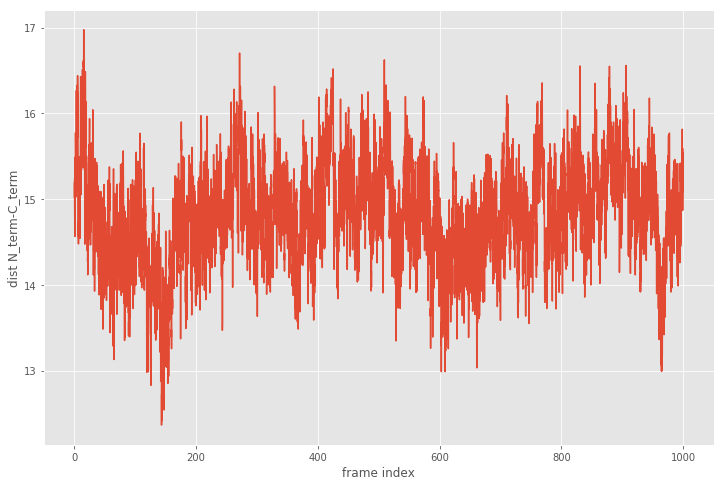

In [84]:
plt.plot(dist[:,0],dist[:,1])
plt.xlabel("frame index")
plt.ylabel("dist N_term-C_term")

In [83]:
dist

array([[0.00000000e+00, 1.50251741e+01],
       [5.00000007e-02, 1.50928888e+01],
       [1.00000001e-01, 1.50784264e+01],
       ...,
       [9.99900024e+02, 1.52270212e+01],
       [9.99950012e+02, 1.53665981e+01],
       [1.00000000e+03, 1.54008408e+01]])

In [86]:
view3 = nv.show_mdtraj(md_traj)
view3.clear_representations()
view3.add_cartoon('protein')
view3.add_licorice('resi 1 159')
view3

NGLWidget(count=20001)